In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
print("Tensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Scikit-learn version: ", sklearn.__version__)

Tensorflow version:  2.8.0
Numpy version:  1.21.5
Pandas version:  1.3.5
Scikit-learn version:  1.0.2


In [ ]:
file = np.load('/content/drive/MyDrive/CWRU.zip') # Give path to downloaded file in your system
print(file.files)

['CWRU files/', 'CWRU files/featurized_data', 'CWRU files/featurized_data_labels', 'CWRU files/signal_data', 'CWRU files/signal_data_labels']


(2800, 1600) (2800,)


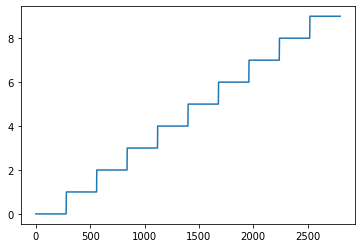

In [ ]:
data = file["CWRU files/signal_data"]
labels = file["CWRU files/signal_data_labels"]
print(data.shape, labels.shape)
plt.plot(labels)

In [ ]:
from matplotlib.image import pil_to_array
data =data.reshape(-1,40,40)
print(data.shape)
pil_to_array("data")


(2800, 40, 40)


AttributeError: ignored

In [ ]:
print(data[0])
print(labels)

[[ 0.07635323  0.01731508 -0.01126523 ... -0.03901108  0.00208615
   0.062376  ]
 [ 0.08386338  0.048816   -0.00250338 ... -0.01877538 -0.00646708
   0.010848  ]
 [-0.00375508 -0.04568677 -0.06341908 ... -0.12183138 -0.06154154
   0.021696  ]
 ...
 [-0.05549169 -0.06592246 -0.01522892 ... -0.08136    -0.03629908
  -0.02211323]
 [-0.03775938 -0.04693846 -0.02774585 ...  0.06800862  0.08887015
   0.05006769]
 [-0.00396369 -0.01648062  0.01460308 ...  0.          0.03337846
   0.035256  ]]
[0. 0. 0. ... 9. 9. 9.]


In [ ]:
category_labels = np.unique(labels)
print(category_labels)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
labels = pd.Categorical(labels, categories = category_labels).codes

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 1000, random_state = 829,stratify = labels)


In [ ]:
train_data = train_data.reshape(len(train_data),40,40,1)
test_data = test_data.reshape(len(test_data),40,40,1)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Shuffle data
index = np.random.permutation(len(train_labels))
(trian_data, trian_labels) = (train_data[index], train_labels[index])

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape )

(1800, 40, 40, 1) (1800, 10) (1000, 40, 40, 1) (1000, 10)


In [ ]:
demo_model = Sequential([
    layers.Conv2D(32,9,activation= 'relu', input_shape = (40,40,1)),
    layers.MaxPool2D(2),
    layers.Conv2D(32,9,activation = 'relu'),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
demo_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 32)          82976     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
def create_compiled_model():
    model = Sequential([
    layers.Conv2D(32,9,activation= 'relu', input_shape = (40,40,1)),
    layers.MaxPool2D(2),
    layers.Conv2D(32,9,activation = 'relu' ),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])
    model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001), 
                  metrics= ['accuracy'])
    return model

In [ ]:
res = np.empty(10)
res[:] = np.nan
for i in range(10):
    model = create_compiled_model()
    history = model.fit (train_data,train_labels,epochs=45, batch_size = 128, verbose = 0)    # Verbosity is set to zero
    res[i] = model.evaluate(test_data, test_labels, batch_size = 128, verbose = 0)[1]          # Verbosity is set to zero
    print('Loop iteration %d, Accuracy: %4.4f' % (i+1, res[i]))
    if res[i]>=np.max(res[:(i+1)]):
        best_model = model

Loop iteration 1, Accuracy: 0.9700
Loop iteration 2, Accuracy: 0.9530
Loop iteration 3, Accuracy: 0.9570
Loop iteration 4, Accuracy: 0.9700
Loop iteration 5, Accuracy: 0.9800
Loop iteration 6, Accuracy: 0.9750
Loop iteration 7, Accuracy: 0.9610
Loop iteration 8, Accuracy: 0.9660
Loop iteration 9, Accuracy: 0.9750
Loop iteration 10, Accuracy: 0.9510


In [ ]:
print('Average accuracy:%4.4f'%(np.mean(res))) # After running the model 10 times
print("Best accuracy: %4.4f"%(np.max(res)))
print("Worst accuracy: %4.4f"%(np.min(res)))
print('Standard deviation: %4.4f' % (np.std(res)))

Average accuracy:0.9658
Best accuracy: 0.9800
Worst accuracy: 0.9510
Standard deviation: 0.0094


In [ ]:
tf.keras.models.save_model(best_model, "CWRU_CNN_raw_time_domain_data.h5")

In [ ]:
prediction = best_model.predict(test_data)
prediction_labels = list([])
for each_prediction in prediction:
    prediction_labels.append(list(each_prediction).index(max(each_prediction)))

In [ ]:
from sklearn.metrics import confusion_matrix
true_labels = np.argmax(test_labels, axis = 1)
matrix = confusion_matrix(true_labels, prediction_labels)

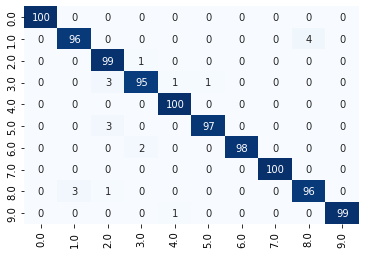

In [ ]:
import seaborn as sns
matrix = pd.DataFrame(matrix)
plt.figure()
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels, cmap = "Blues", cbar = False)
plt.xticks(rotation = 90)
plt.show()